# Lecture 11: 2021-07-03 Naive Bayes Classifier II

## 0. Lecture Outline

- Assignments and Grades
- Example of NLP research [ChatGPT](https://arxiv.org/pdf/2302.13795.pdf)
- Naive Bayes Classification
  - Continuous
  - Multinomial
- Naive Bayes Classifier
  - Example
  - Implementation
  - Evaluation
  - Comparison with Logistic Regression

Keyterms: #model, #heuristic, #Bernoulli, #Prior, #Likelihood, #Evidence, #Posterior, #Vocabulary, #Laplace_Smoothing, #Tokenization, #Features, #TF-IDF, #Vectorization, #Stopwords, #Stemming, #Lemmatization, #Naive_Bayes_Classifier, #Multinomial, #Continuous, #Evaluation, #Accuracy, #Precision, #Recall, #F1_Score, #Confusion_Matrix, #ROC_Curve, #AUC, #Logistic_Regression, #Comparison

## 1. Summary of the Naive Bayes Classifier

#### 1.1. Background Assumptions

Bayes theorem is a fundamental result in statistics and machine learning. It is used to compute the posterior probability of an event given some evidence. To understand Bayes theorem, let's assume we have two events $A$ and $B$. We let $A$ stand for a movie review being positive and $B$ stand for the review being negative. We want to compute the probability that a review is positive given that the review contains the word "excellent". Thus, we have two classes where the membership of $x$ is deteremined by the words contained in the review or `document`: $c_i = \{d \space | \space d \space is \space positive\}$ and $c_j = \{d \space | \space d \space is \space negative\}$.

So we can ask the question: "What is the probability that a review is positive given that the review contains the word "excellent"?

$$P('excellent'|positive)$$

If we assumed the presence of one word is dependent on the presence of any other word in our vocabulary, we would therefore have to compute the chain probability of an array of words with every word in our vocabulary:

$$P(d|v) = P(w_1, w_2, \ldots, w_n|v) = P(w_1|v)P(w_2|v)\ldots P(w_n|v)$$

This of course is computationally infeasible. So we make the assumption that the presence of one word is independent of the presence of any other word in our vocabulary. This is called the Naive Bayes assumption. This assumption is naive because it is not true in general. However, it is a good approximation in many cases. We can write the probability of a document $d$ given a class $c$ as:

$$P(d|c) = P(w_1|c)P(w_2|c)\ldots P(w_n|c)$$


We have simplified the problem, yet we have introduced a `bias`. The `bias` betrays our understanding of linguistic experience where it is natural to assume the presence of one word is conditionally dependent on the presence of other words: e.g, `Richmond, Virginia`.

We can now compute the probability that a review is positive given that the review contains the word "excellent":

$$\frac{P(positive) \times P('excellent'|positive)}{P(positive) \times P('excellent'|positive) + P(negative) \times P('excellent'|negative)}$$

So we can understand the proir, likelihood, evidence, and posterior as follows:

`Priors` = $P(positive)$ and $P(negative)$ <br>

`likelihoods` = $P('excellent'|positive)$ and $P('excellent'|negative)$

`evidence` = $P(positive) \times P('excellent'|positive) + P(negative) \times P('excellent'|negative)$

`posterior` = $\frac{P(positive) \times P('excellent'|positive)}{P(positive) \times P('excellent'|positive) + P(negative) \times P('excellent'|negative)}$





#### 1.2. Data Preprocessing steps

We now featurize our data by the following steps:

- Tokenization
- Stopwords removed (low information words)
- Strip punctuation (low semantic value)
- Stemming or Lemmatization



## 2. Naive Bayes Classifier for Sentiment Analysis

#### 2.1. Twitter Sentiment Analysis

In this example, we will use the [Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) dataset from Kaggle. The dataset contains 14,640 tweets from 6 US airlines. The tweets are labeled as positive, negative, or neutral. The goal is to predict the sentiment of a tweet given the text of the tweet.

##### 2.1.1. Package imports

In [1]:
## import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import re
import string

from nltk.corpus import stopwords
from nltk.corpus import twitter_samples
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn import datasets

##### 2.1.2. Defining our negative and positive classes

In [2]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

## check the number of positive and negative tweets
len(pos_tweets), len(neg_tweets)

(5000, 5000)

In [3]:
## examine some random samples
print('Positive tweet:', pos_tweets[random.randint(0,5000)])
print('Negative tweet:', neg_tweets[random.randint(0,5000)])

Positive tweet: Stats for the day have arrived. 4 new followers and NO unfollowers :) via http://t.co/Hk8VpyVCu6.
Negative tweet: why so sudden :((


##### 2.1.3. Data Preprocessing


In [4]:
def process_tweet(tweet):
    """Input: tweet a string containing a tweet
    Return:
    tweets_clean: a list of words containing the processed tweet
    """
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # remove retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#', '', tweet)
    
    # Instantiate stemmer class
    stemmer = PorterStemmer()
    
    # Create stopwords list
    stopwords_english = stopwords.words('english')
    
    # Tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    
    # Tokenize the tweets
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    
    return tweets_clean

##### 2.1.4. Let's create our train and validation sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(pos_tweets + neg_tweets,
                                                    np.append(np.ones(len(pos_tweets)),
                                                    np.zeros(len(neg_tweets))),
                                                    test_size=0.2, random_state=42)

In [6]:
## Counts of positive and negative tweets
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

In [7]:
## Examine some random samples
idx = random.randint(0, len(X_train))

print('Tweet:', X_train[idx])
print('Tweet label:', y_train[idx])

Tweet: @xfiIes :() IS there A CAT CAFE IN MELBOURNE
Tweet label: 0.0


##### 2.1.5. Let's define our frequency dictionary

In [8]:
## Let's create a dictionary of words and their frequencies
def count_tweets(result, tweets, ys):
    """Input:
    result: a dictionary that will contain the frequency of each pair (word, label)
    tweets: a list of tweets
    ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)
    """
    # iterate through each tweet and its label
    for y, tweet in zip(ys, tweets):
        # process the tweet to get the words in the form of a list
        for word in process_tweet(tweet):
            # increment the word count for the pair (word, label)
            pair = (word, y)
            if pair in result:
                result[pair] += 1
            else:
                result[pair] = 1
    return result

In [9]:
freqs = count_tweets({}, X_train, y_train)

In [10]:
freqs[('happi', 1.0)]

173

##### 2.1.6. Let's define our Naive Bayes Classifier

In [11]:
## Let's create a function to extract the features from the tweets

def train_naive_bayes(freqs, X, y):
    """Train a Naive Bayes classifier on twitter data.

    Args:
        freqs (dict): dictionary of (word, label): frequency pairs
        X_train (list): list of tweets
        y_train (list): list of tweets
        
    returns:
    logprior (float): log prior
    loglikelihood (dict): dictionary of (word, label): log likelihood pairs
    """
    ## Compare the code here with Jurafsky and Martin's pseudocode
    
    loglikelihood = {}
    logprior = 0
    
    vocab = set([pair[0] for pair in freqs.keys()]) # words in the vocabulary
    V = len(vocab) # number of unique words in the vocabulary
    
    # Calculate N_pos and N_neg tweets (number of positive and negative tweets)
    N_pos, N_neg = 0, 0 # number of positive and negative tweets
    
    # Calculate the number of positive and negative tweets
    for pair in freqs.keys():
        if pair[1] > 0:
            N_pos += freqs[pair] # positive tweets
        else:
            N_neg += freqs[pair] # negative tweets
    
    # Documents = total number of tweets
    D = len(X)
    
    # Calculate # of positive and negative documents
    D_pos = np.sum(y)
    D_neg = D - D_pos
    
    logprior = np.log(D_pos) - np.log(D_neg)
    
    for word in vocab:
        
        freq_pos = freqs.get((word, 1.0), 0)
        freq_neg = freqs.get((word, 0.0), 0)
        
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)
        
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)
    
    return logprior, loglikelihood

##### 2.1.7. Let's train our Naive Bayes Classifier

In [12]:
## Let's test our function
logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)

##### 2.1.7. Let's test our Naive Bayes Classifier


In [13]:
def predict_naive_bayes(tweet, logprior, loglikelihood):
    """Input:
    tweet: a string
    logprior: a number
    loglikelihood: a dictionary of words mapping to numbers
    Output:
    p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)
    """
    word_l = process_tweet(tweet)
    
    p = 0
    p += logprior
    
    for word in word_l:
        if word in loglikelihood:
            p += loglikelihood[word]
    
    return p

def test_naive_bayes(X_test, y_test, logprior, loglikelihood):
    """Input:
    X_test: a list of tweets
    y_test: (m, 1) array with the sentiment label of each tweet (either 0 or 1)
    logprior: a number
    loglikelihood: a dictionary of words mapping to numbers
    Output:
    accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    # Let's score the accuracy of our model
    accuracy = 0
    
    # Our predictions will be stored in y_hat
    y_hat = []
    
    for tweet in X_test:
        if predict_naive_bayes(tweet, logprior, loglikelihood) > 0:
            y_hat.append(1)
        else:
            y_hat.append(0)
    
    # error is the average of the absolute values of the differences between y_hat and y_test
    error = np.mean(np.abs(y_hat - y_test))
    
    accuracy = 1 - error
    
    return accuracy

In [14]:
print("Naive Bayes accuracy = %f" % test_naive_bayes(X_test, y_test, logprior, loglikelihood))

Naive Bayes accuracy = 0.989500


## 3. Naive Bayes Classifier for Binary Classification: Movie Review Sentiment Analysis


In the above, we precomputed the frequency of each word in our vocabulary. We can, however, implement a Naive Bayes classifier in a different manner. In this example, we will create some classes that will allow us to train a Naive Bayes classifier on the fly. We will use the [IMDB Movie Review Dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) from Kaggle. The dataset contains 50,000 movie reviews from IMDB. The reviews are labeled as positive or negative. The goal is to predict the sentiment of a movie review given the text of the review.

##### 3.1.1. Package imports

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

## html display
from IPython.display import display, HTML

##### 3.1.2. Read data and create train and validation sets

In [209]:
## Let's create a dataframe to store the results
df = pd.read_csv('data/IMDB_Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [210]:
df.shape

(50000, 2)

In [211]:
## Create our train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [212]:
# Let's check the count of our train and test sets
len(X_train), len(X_test), len(y_train), len(y_test)

(40000, 10000, 40000, 10000)

In [213]:
## Randomly select a sample from the training set
idx = random.randint(0, len(X_train))

# display the sample in HTML format
print(display(HTML(f"<p>Tweet: {X_train.iloc[idx]}</p>")))
print('label:', y_train.iloc[idx])

None
label: positive


In [218]:
import math

class NaiveBayesClassifier:
    def __init__(self):
        self.positive_word_counts = {}
        self.negative_word_counts = {}
        self.positive_total_count = 0
        self.negative_total_count = 0
        self.vocab = set()

    def train(self, data):
        for text, label in data:
            if label == 'positive':
                self.positive_total_count += 1
                for word in text.split():
                    self.positive_word_counts[word] = self.positive_word_counts.get(word, 0) + 1
                    self.vocab.add(word)
            elif label == 'negative':
                self.negative_total_count += 1
                for word in text.split():
                    self.negative_word_counts[word] = self.negative_word_counts.get(word, 0) + 1
                    self.vocab.add(word)

    def predict(self, text):
        # Calculate the prior probability of each class
        positive_prior = self.positive_total_count / (self.positive_total_count + self.negative_total_count + 1e-10)
        negative_prior = self.negative_total_count / (self.positive_total_count + self.negative_total_count + 1e-10)

        # Calculate the likelihood of the text given each class
        positive_likelihood = 0
        negative_likelihood = 0
        for word in text.split():
            if word in self.vocab:
                # Add Laplace smoothing to avoid zero probability
                positive_likelihood += math.log((self.positive_word_counts.get(word, 0) + 1) / (self.positive_total_count + len(self.vocab) + 1))
                negative_likelihood += math.log((self.negative_word_counts.get(word, 0) + 1) / (self.negative_total_count + len(self.vocab) + 1))

        # Calculate the posterior probability of each class
        positive_posterior = math.exp(positive_likelihood) * positive_prior
        negative_posterior = math.exp(negative_likelihood) * negative_prior

        # Return the class with the highest posterior probability
        if positive_posterior > negative_posterior:
            return 'positive'
        else:
            return 'negative'


In [219]:
## Shape our data
nb = NaiveBayesClassifier()
nb.train(zip(X_train, y_train))


In [220]:
## Test random sample
random_idx = random.randint(0, len(X_test))
result = nb.predict(X_test.iloc[random_idx])
print(display(HTML(f"<p>Tweet: {X_test.iloc[random_idx]}</p> <p>{y_test.iloc[random_idx]}</p>")))
print('prediction:', result)

None
prediction: negative


In [221]:
## Test accuracy

correct_predictions = 0
total_predictions = len(X_test)

for text, label in zip(X_test, y_test):
    pred = nb.predict(text)
    if pred == label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print('Accuracy:', accuracy)

Accuracy: 0.6517


##### 3.1.3. Can we improve our model with vectors?

In [242]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [243]:
## Let's create a dataframe to store the results
df = pd.read_csv('data/IMDB_Dataset.csv')
df.shape

(50000, 2)

In [244]:
## Let's convert the sentiment to labels
sentiment = {'positive': 1, 'negative': 0}

df['sentiment'] = df['sentiment'].map(sentiment)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [245]:
## Let's define our X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(40000, 10000, 40000, 10000)

In [252]:
# Vectorize the text data using the CountVectorizer class
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(X_train)
validation_vectors = vectorizer.transform(X_test)

In [253]:
# Train a Naive Bayes classifier using the MultinomialNB class
classifier = MultinomialNB()
classifier.fit(train_vectors, y_train)

# Make predictions on the validation data
predictions = classifier.predict(validation_vectors)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')  # Output: Accuracy: 0.80

Accuracy: 0.86


## 4. Naive Bayes Classifier for Multiclass Classification

## 4.1 Naive Bayes Classifier for Multiclass Classification: Airline review sentiment analysis

In this example, we will use the [Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) dataset from Kaggle. The dataset contains 14,640 tweets from 6 US airlines. The tweets are labeled as positive, negative, or neutral. The goal is to predict the sentiment of a tweet given the text of the tweet.

### 4.1.1. Package imports

In [255]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


### 4.1.2. Read our data

In [257]:
df = pd.read_csv('data/Tweets.csv')
df.shape

(14640, 15)

### 4.1.3. Keep the tweet and label the sentiment

In [258]:
sentiment = {'negative': 0, 'neutral': 1, 'positive': 2}

df = df[['text', 'airline_sentiment']]

df['airline_sentiment'] = df['airline_sentiment'].map(sentiment)

df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


### 4.1.4. Create our train and validation sets

In [259]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(11712, 2928, 11712, 2928)

### 4.1.5. Create our text vectors

In [260]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer on our corpus
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

### 4.1.5. Train and evaluate our model

In [262]:
# Train a Naive Bayes classifier
nb = MultinomialNB()

# Fit the classifier on the training data
nb.fit(X_train_vectors, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test_vectors)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.79


### 4.1.6. Let's see where our model is making mistakes

<AxesSubplot: >

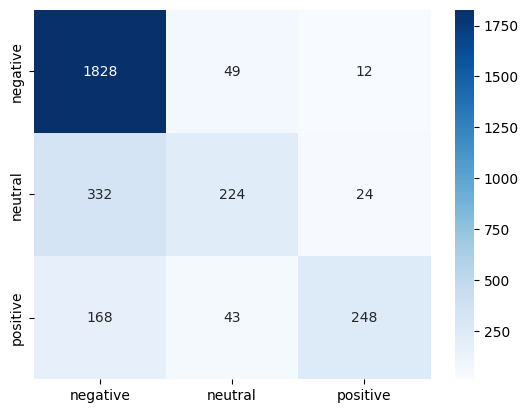

In [264]:
## Create a confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

## visualize the confusion matrix
cfm = confusion_matrix(y_test, y_pred)

## plot the confusion matrix
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])

### 4.1.7. Let's see some of the mistakes

In [266]:
# output some of the misclassified tweets
misclassified = np.where(y_pred != y_test)[0]
print('Misclassified tweets:', len(misclassified))

## create a dataframe to store the misclassified tweets
misclassified_df = pd.DataFrame({'text': X_test.iloc[misclassified], 'actual': y_test.iloc[misclassified], 'predicted': y_pred[misclassified]})
misclassified_df.head()

Misclassified tweets: 628


,text,actual,predicted
5460,@SouthwestAir it was 3472,1,0
4590,@SouthwestAir thanks for the quick response. S...,2,0
12542,@AmericanAir and btwn gate a8 &amp; a15 I lost...,1,0
379,@VirginAmerica Just bought tix for ATX - Dalla...,2,0
8121,@JetBlue haha no need to apologize 😁 I'll be F...,2,0


## 5. Naive Bayes Optimizations with TF-IDF

In [268]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [269]:
## Let's create a TF-IDF vectorizer
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [270]:
y_pred = text_clf.predict(X_test)

In [271]:
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.68      1.00      0.81      1889
     neutral       0.80      0.13      0.23       580
    positive       0.92      0.12      0.22       459

    accuracy                           0.69      2928
   macro avg       0.80      0.42      0.42      2928
weighted avg       0.74      0.69      0.60      2928



## 6. Evaluation 

* gold labels = human labels of the input data
* predicted labels = labels predicted by the model

* True positive (TP) = predicted positive and gold positive
* False positive (FP) = predicted positive and gold negative (Type I error)
* True negative (TN) = predicted negative and gold negative 
* False negative (FN) = predicted negative and gold positive (Type II error)

* precision = $\frac{TP}{TP + FP}$
* recall = $\frac{TP}{TP + FN}$
* F1 or F-measure = $F\beta \frac{(\beta^2 + 1)\times precision \times recall}{\beta^2 precision + recall}$
* accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$